<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/TimeSeries_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("C:\\Users\\nikhilran\\Desktop\\ts-bob\\RE__test_mail\\Train_ts_Data.csv")
data.Date = pd.to_datetime(data.Date)
data.to_csv("C:\\Users\\nikhilran\\Desktop\\ts-bob\\RE__test_mail\\New_Overall_Call_Volume_Orignial_Model_Data.csv")

df = pd.read_csv("C:\\Users\\nikhilran\\Desktop\\ts-bob\\RE__test_mail\\New_Overall_Call_Volume_Orignial_Model_Data.csv")

data1 = df[['Date','Offered']]
#data1['CallVolumes'] = data1['Offered']-20000
data1.reset_index(inplace=True)

data1['Date'] = pd.to_datetime(data1['Date'])


ts1 = data1.set_index('Date')

C:\ProgramData\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


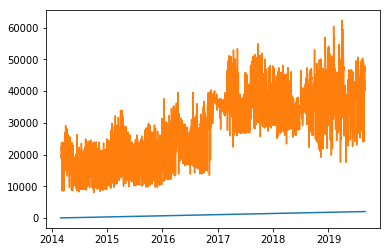

In [ ]:
plt.plot(ts1)
#plt.show()

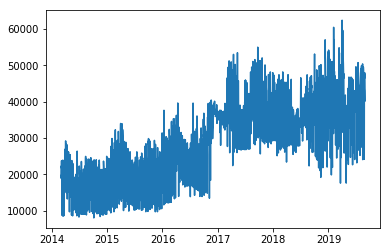

In [ ]:
#ts = ts1['2018-1-15':'2019-07-15']
ts =ts1
plt.plot(ts['Offered'])
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(ts['Offered'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.549833
p-value: 0.508732
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
### the time series from 15th July,2018 to 15th July, 2019 is stationery

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

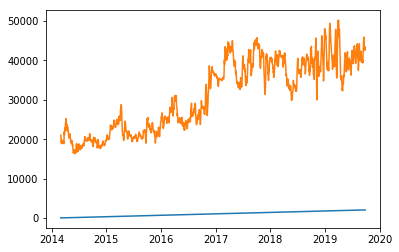

In [ ]:
plt.plot(trend)

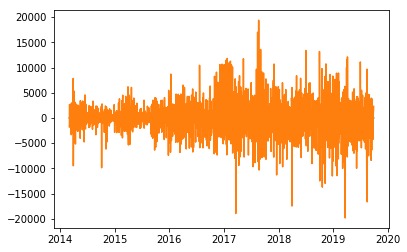

In [ ]:
plt.plot(residual)

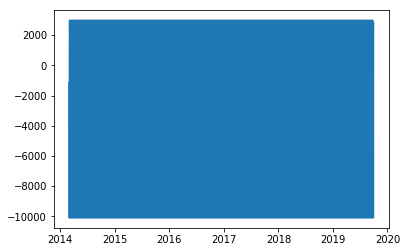

In [ ]:
plt.plot(seasonal['Offered'])

In [ ]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(seasonal['Offered'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -14040183204227658.000000
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(trend['Offered'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.242474
p-value: 0.655063
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
import pmdarima as pm
model = pm.auto_arima(ts1['Offered'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0,
                      start_Q=0,
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=40224.558, BIC=40246.886, Fit time=0.247 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=41928.747, BIC=41939.911, Fit time=0.038 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=40411.044, BIC=40427.790, Fit time=0.100 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=41207.522, BIC=41224.268, Fit time=0.264 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=40210.197, BIC=40238.108, Fit time=0.349 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=40289.826, BIC=40312.155, Fit time=0.186 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=39911.333, BIC=39944.826, Fit time=0.569 seconds
Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=39654.323, BIC=39698.981, Fit time=2.907 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=39824.444, BIC=39863.520, Fit time=2.083 seconds
Fit ARIMA: order=(4

In [ ]:
trend1 = trend.diff()

In [ ]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(trend1['Offered'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.029384
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


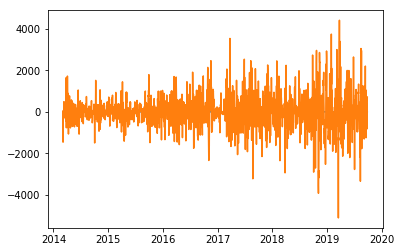

In [ ]:
plt.plot(trend1)


In [ ]:
y = seasonal['Offered']
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

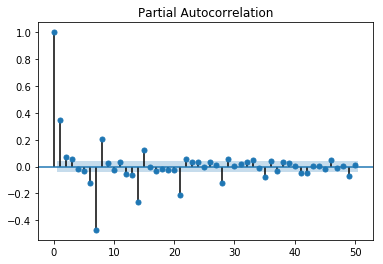

In [ ]:
plot_pacf(trend1['Offered'].dropna(),lags=50)
plt.show()

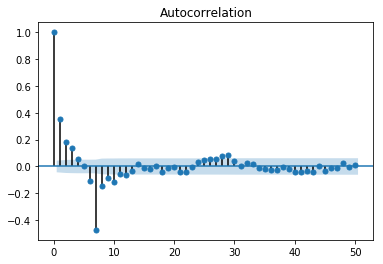

In [ ]:
plot_acf(trend1['Offered'].dropna(),lags=50)
plt.show()

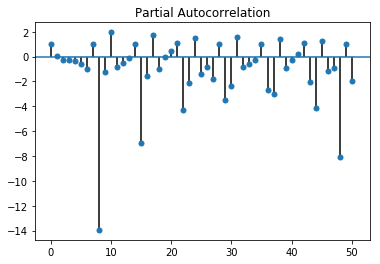

In [ ]:
plot_pacf(seasonal['Offered'].dropna(),lags=50)
plt.show()

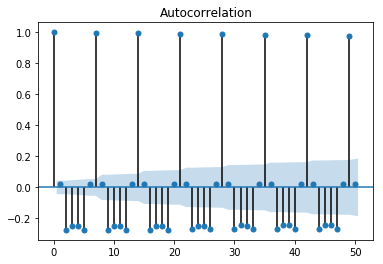

In [ ]:
plot_acf(seasonal['Offered'].dropna(),lags=50)
plt.show()

In [ ]:
### As per the pacf and acf analysis for trend and seasonality , we get the followign parameters :

## p = 1
## d = 1
## q = 1
## Seasonality = 7
## P = 1 OR 2
## D = 0
## Q = 2 

In [ ]:
model=sm.tsa.statespace.SARIMAX(endog=ts1['Offered'],order=(1,1,1),seasonal_order=(2,0,2,7),trend='c',enforce_invertibility=False,enforce_stationarity=True)

C:\Users\nikhilran\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
model1 = model.fit(disp=0)

C:\Users\nikhilran\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
start_index = '2019-09-01'
end_index = '2019-11-30'


In [ ]:
y_pred = model1.predict(start=start_index,end=end_index,typ='levels')

In [ ]:
y_pred.to_frame()

,0
2019-09-01,29257.210318
2019-09-02,44807.579448
2019-09-03,46360.912310
2019-09-04,46226.335048
2019-09-05,42302.445753
2019-09-06,43948.949177
2019-09-07,39384.926571
2019-09-08,29114.859088
2019-09-09,44738.472940
2019-09-10,46415.252772


In [ ]:
y_pred.to_csv("C:\\Users\\nikhilran\\Desktop\\ts-bob\\RE__test_mail\\Prediction_Data_Till_November.csv")

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
